# 주차수요 예측

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [219]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
age_gender_info = pd.read_csv('../data/age_gender_info.csv')

In [220]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [221]:
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [222]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

- train 결측치 : 임대료, 임대보증금 , 지하철역, 버스정류장
- test 결측치 : 임대료, 임대보증금, 자격유형(신분), 지하철역

- 임대료와 임대보증금, 자격유형은 관련있는 feature를 찾아 비슷한 수준의 값을 넣어주려함.
- 지하철역과 버스정류장은 0이라는 값이 따로 존재함을 확인. 전체의 평균치로 대체할 예정.


In [223]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [224]:
train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)']==0]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


<AxesSubplot:xlabel='단지내주차면수', ylabel='등록차량수'>

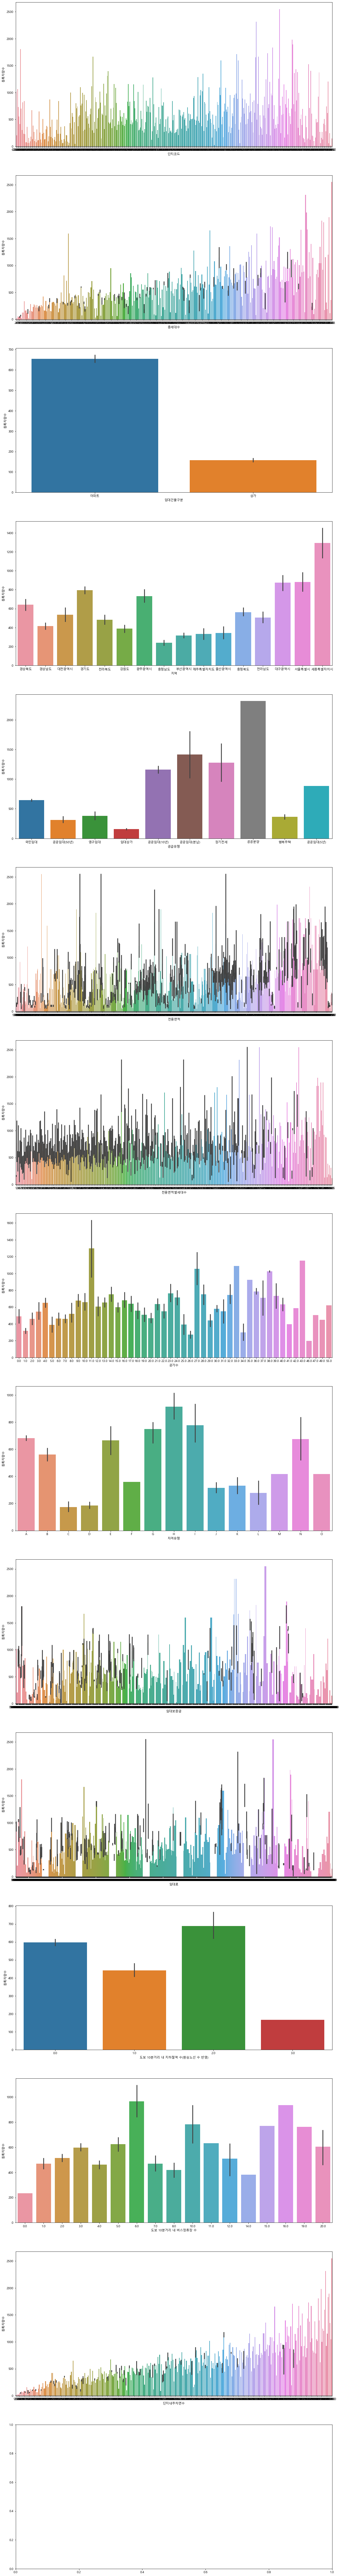

In [225]:
figure, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10,ax11,ax12, ax13,ax14,ax15) = plt.subplots(nrows=15, ncols=1)
# figure, ax1 =plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 10*15)

sns.barplot(data = train, x ='단지코드', y = '등록차량수', ax = ax1 )
#ax1.set(title='단지코드')
sns.barplot(data = train, x ='총세대수', y = '등록차량수', ax = ax2 )
sns.barplot(data = train, x ='임대건물구분', y = '등록차량수', ax = ax3 )
sns.barplot(data = train, x ='지역', y = '등록차량수', ax = ax4 )
sns.barplot(data = train, x ='공급유형', y = '등록차량수', ax = ax5 )
sns.barplot(data = train, x ='전용면적', y = '등록차량수', ax = ax6 )
sns.barplot(data = train, x ='전용면적별세대수', y = '등록차량수', ax = ax7 )
sns.barplot(data = train, x ='공가수', y = '등록차량수', ax = ax8 )
sns.barplot(data = train, x ='자격유형', y = '등록차량수', ax = ax9 )
sns.barplot(data = train, x ='임대보증금', y = '등록차량수', ax = ax10 )
sns.barplot(data = train, x ='임대료', y = '등록차량수', ax = ax11 )
sns.barplot(data = train, x ='도보 10분거리 내 지하철역 수(환승노선 수 반영)', y = '등록차량수', ax = ax12 )
sns.barplot(data = train, x ='도보 10분거리 내 버스정류장 수', y = '등록차량수', ax = ax13 )
sns.barplot(data = train, x ='단지내주차면수', y = '등록차량수', ax = ax14 )

- 상가 < 아파트
- 총세대수 , 단지내 주차면수 정비례관계
- 지역 : 세종시 > 서울시 > 대구 > 경기 > 광주 ... -> 인구분포와비교필요해보임

                                  총세대수      전용면적  전용면적별세대수       공가수  \
총세대수                          1.000000  0.042271  0.098205  0.068192   
전용면적                          0.042271  1.000000 -0.035479 -0.089201   
전용면적별세대수                      0.098205 -0.035479  1.000000  0.166472   
공가수                           0.068192 -0.089201  0.166472  1.000000   
도보 10분거리 내 지하철역 수(환승노선 수 반영)  0.213843 -0.013111 -0.056680 -0.093334   
도보 10분거리 내 버스정류장 수           -0.001446 -0.007866  0.047112  0.043285   
단지내주차면수                       0.501488  0.071260  0.281989  0.289819   
등록차량수                         0.316703  0.115453  0.247085  0.118121   

                              도보 10분거리 내 지하철역 수(환승노선 수 반영)  \
총세대수                                              0.213843   
전용면적                                             -0.013111   
전용면적별세대수                                         -0.056680   
공가수                                              -0.093334   
도보 10분거리 내 지하철역 수(환승노선 수 반영)             

<AxesSubplot:>

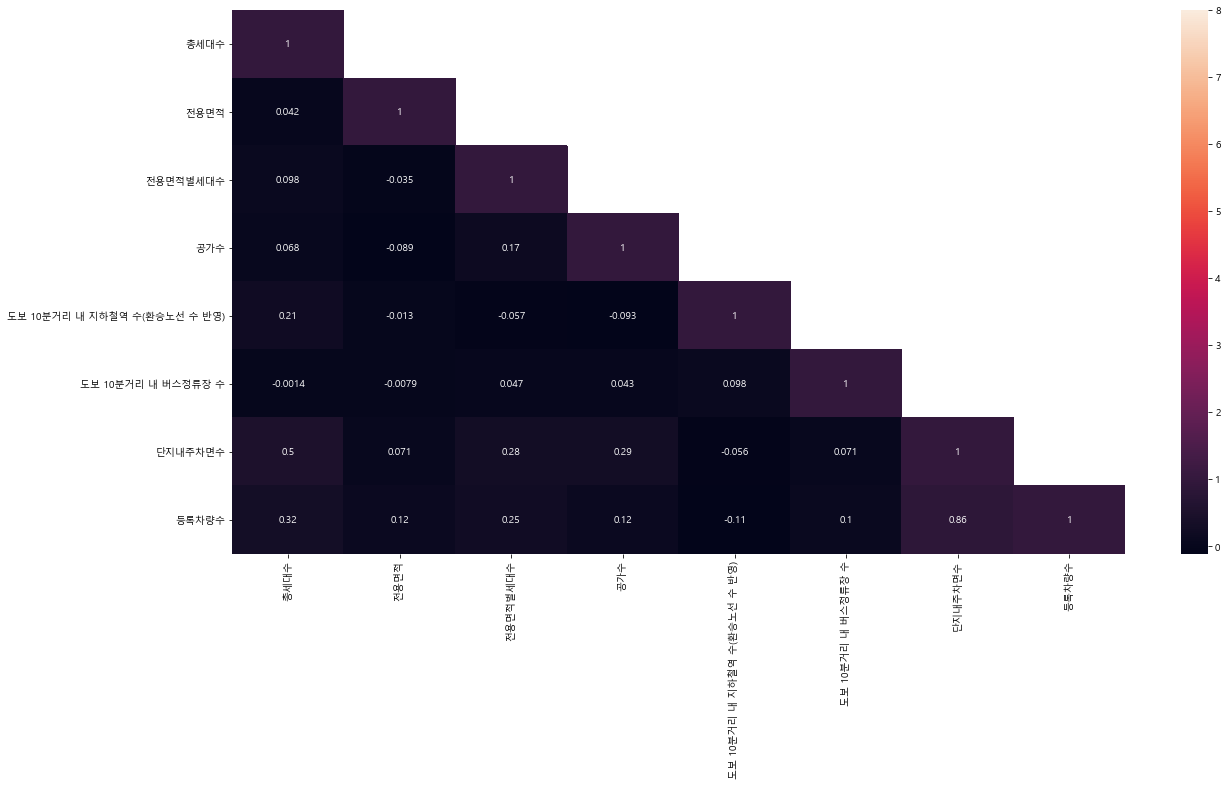

In [226]:
corrMatt = train[["총세대수", "공급유형", "전용면적", "전용면적별세대수", "공가수", "자격유형", "임대보증금","임대료",'도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수','단지내주차면수','등록차량수']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False


fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=8, annot=True)

단지내 주차면수 : 0.86
총 세대수 : 0.32
전용면적별 세대수 : 0.25
전용면적, 공가수 : 0.12
도보 10분이내 버스 정류장수 : 0.1
도보 10분거리내 지하철역수 : -0.11

Skewness: 1.461736
Kurtosis: 2.976970


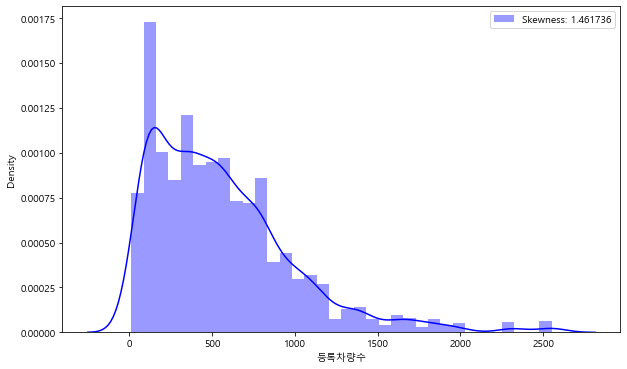

In [227]:
f, ax = plt.subplots(1, 1, figsize = (10,6)) 
g = sns.distplot(train["등록차량수"], color = "b", label="Skewness: {:2f}".format(train["등록차량수"].skew()), ax=ax) 
g = g.legend(loc = "best") 
print("Skewness: %f" % train["등록차량수"].skew()) 
print("Kurtosis: %f" % train["등록차량수"].kurt())


## 가공

In [231]:
train=train.sort_values(['전용면적별세대수','전용면적'],ascending=False)

In [234]:
train['rank'] = train.groupby(['단지코드'])['전용면적별세대수'].rank(method='first',ascending=False)

In [240]:
train = train.loc[train['rank']==1]

In [241]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,rank
261,C1859,2424,아파트,대전광역시,영구임대,26.37,1865,1.0,C,5787000,79980,1.0,4.0,487.0,116.0,1.0
417,C1109,1957,아파트,부산광역시,영구임대,26.37,1490,1.0,C,5787000,79980,1.0,2.0,351.0,313.0,1.0
569,C1439,1755,아파트,부산광역시,영구임대,26.37,1470,29.0,C,5787000,79980,1.0,3.0,270.0,172.0,1.0
523,C2132,2428,아파트,부산광역시,영구임대,26.37,1192,1.0,F,3912000,67260,0.0,1.0,756.0,359.0,1.0
497,C2310,1988,아파트,부산광역시,영구임대,26.37,1074,1.0,C,5787000,79980,0.0,2.0,217.0,189.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,C2586,90,아파트,제주특별자치도,행복주택,36.72,36,7.0,J,36000000,153000,0.0,3.0,66.0,57.0,1.0
2740,C1803,100,아파트,울산광역시,행복주택,16.67,32,13.0,J,22000000,104680,0.0,2.0,57.0,78.0,1.0
2942,C2020,40,아파트,부산광역시,행복주택,16.80,20,7.0,L,18000000,87000,1.0,2.0,25.0,19.0,1.0
2823,C2059,26,아파트,경기도,행복주택,36.79,14,1.0,L,64147000,267000,1.0,3.0,13.0,13.0,1.0


In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 261 to 2041
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          423 non-null    object 
 1   총세대수                          423 non-null    int64  
 2   임대건물구분                        423 non-null    object 
 3   지역                            423 non-null    object 
 4   공급유형                          423 non-null    object 
 5   전용면적                          423 non-null    float64
 6   전용면적별세대수                      423 non-null    int64  
 7   공가수                           423 non-null    float64
 8   자격유형                          423 non-null    object 
 9   임대보증금                         422 non-null    object 
 10  임대료                           422 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  403 non-null    float64
 12  도보 10분거리 내 버스정류장 수            422 non-null    float64
 13  단지

In [243]:
train['도보 10분거리 내 버스정류장 수'].mean()

3.699052132701422

In [244]:
train['도보 10분거리 내 버스정류장 수'].fillna(4)

261     4.0
417     2.0
569     3.0
523     1.0
497     2.0
       ... 
2936    3.0
2740    2.0
2942    2.0
2823    3.0
2041    3.0
Name: 도보 10분거리 내 버스정류장 수, Length: 423, dtype: float64

In [245]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean()

0.12655086848635236

In [246]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

261     1.0
417     1.0
569     1.0
523     0.0
497     0.0
       ... 
2936    0.0
2740    0.0
2942    1.0
2823    1.0
2041    0.0
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), Length: 423, dtype: float64

<AxesSubplot:xlabel='단지내주차면수', ylabel='등록차량수'>

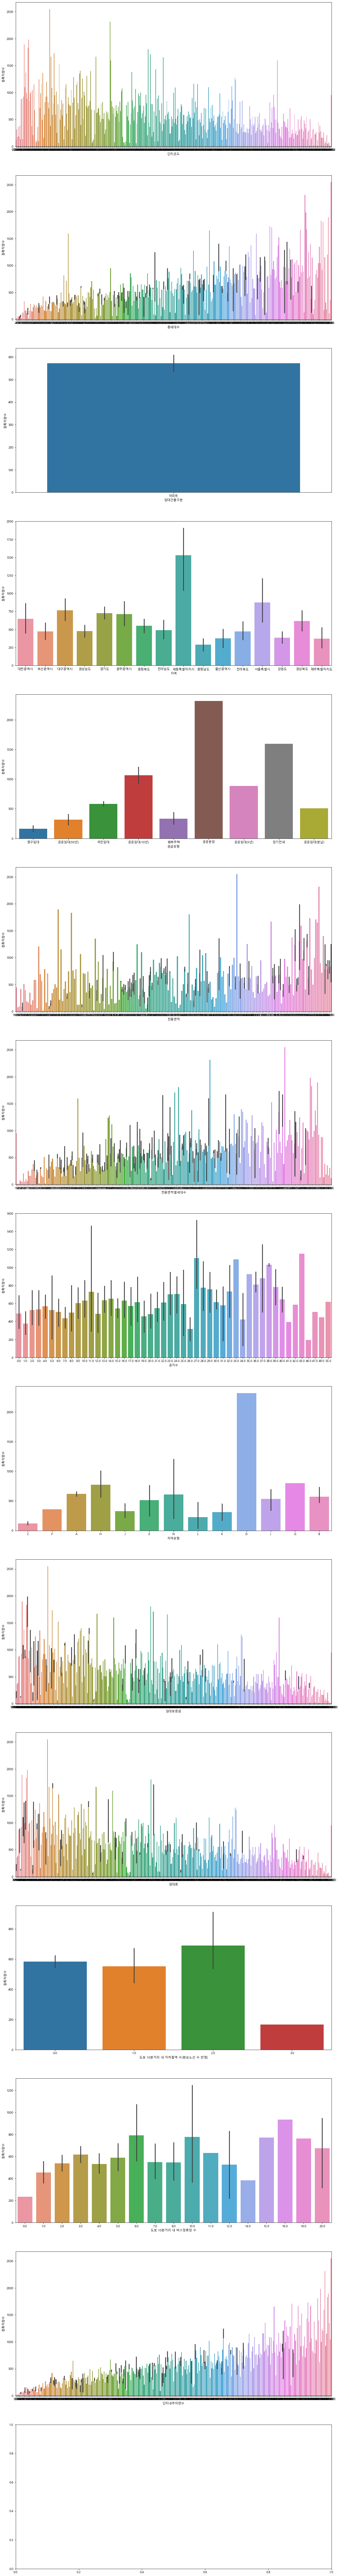

In [247]:
figure, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10,ax11,ax12, ax13,ax14,ax15) = plt.subplots(nrows=15, ncols=1)
# figure, ax1 =plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 10*15)

sns.barplot(data = train, x ='단지코드', y = '등록차량수', ax = ax1 )
#ax1.set(title='단지코드')
sns.barplot(data = train, x ='총세대수', y = '등록차량수', ax = ax2 )
sns.barplot(data = train, x ='임대건물구분', y = '등록차량수', ax = ax3 )
sns.barplot(data = train, x ='지역', y = '등록차량수', ax = ax4 )
sns.barplot(data = train, x ='공급유형', y = '등록차량수', ax = ax5 )
sns.barplot(data = train, x ='전용면적', y = '등록차량수', ax = ax6 )
sns.barplot(data = train, x ='전용면적별세대수', y = '등록차량수', ax = ax7 )
sns.barplot(data = train, x ='공가수', y = '등록차량수', ax = ax8 )
sns.barplot(data = train, x ='자격유형', y = '등록차량수', ax = ax9 )
sns.barplot(data = train, x ='임대보증금', y = '등록차량수', ax = ax10 )
sns.barplot(data = train, x ='임대료', y = '등록차량수', ax = ax11 )
sns.barplot(data = train, x ='도보 10분거리 내 지하철역 수(환승노선 수 반영)', y = '등록차량수', ax = ax12 )
sns.barplot(data = train, x ='도보 10분거리 내 버스정류장 수', y = '등록차량수', ax = ax13 )
sns.barplot(data = train, x ='단지내주차면수', y = '등록차량수', ax = ax14 )

In [248]:
train.loc[train['임대보증금']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,rank
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0,1.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0,1.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0,1.0


In [249]:
train.loc[train['임대보증금']=='-','임대보증금'] = None

In [250]:
train.loc[train['임대료']=='-','임대료'] = None

In [251]:
train.loc[train['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,rank
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,None,None,0.0,4.0,1670.0,1153.0,1.0
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0,1.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,None,None,0.0,8.0,664.0,744.0,1.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,None,None,0.0,3.0,338.0,345.0,1.0


In [252]:
train.loc[train['임대보증금']=='0']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,rank


In [253]:
train['임대보증금'].fillna('0',inplace=True)
train['임대료'].fillna('0',inplace=True)

In [254]:
train.loc[train['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,rank


In [255]:
train[['임대보증금','임대료']]=train[['임대보증금','임대료']].astype(int)

In [256]:
train['임대보증금'].mean()

23280452.482269503

In [257]:
train['임대료'].mean()

179728.841607565

In [258]:
train.loc[train['임대료']==0,'임대료'] = 180586

In [259]:
train.loc[train['임대보증금']==0,'임대보증금'] = 23546451

In [262]:
test=test.sort_values(['전용면적별세대수','전용면적'],ascending=False)
test['rank']= test.groupby('단지코드')['전용면적별세대수'].rank(method='first',ascending=False)
test = test.loc[test['rank']==1]

In [263]:
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,rank
114,C2676,2572,아파트,부산광역시,영구임대,26.37,1341,25.0,C,5787000,79980,0.0,2.0,418.0,1.0
231,C1812,1021,아파트,울산광역시,영구임대,26.37,745,22.0,C,3922000,72830,0.0,4.0,185.0,1.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,1.0
608,C2028,1267,아파트,경상남도,국민임대,59.88,740,26.0,A,31210000,187260,0.0,12.0,1280.0,1.0
714,C2224,826,아파트,경상남도,국민임대,51.59,658,26.0,A,27597000,315070,0.0,4.0,746.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,C2404,214,아파트,전라남도,행복주택,36.85,60,15.0,J,25600000,160000,0.0,5.0,117.0,1.0
881,C2688,150,아파트,전라남도,국민임대,33.53,56,1.0,H,6682000,115130,0.0,3.0,107.0,1.0
894,C1327,98,아파트,대전광역시,행복주택,36.92,48,13.0,J,36800000,184000,NaN,17.0,98.0,1.0
955,C1841,100,아파트,광주광역시,행복주택,16.80,40,14.0,J,16768000,86630,0.0,4.0,53.0,1.0


In [264]:
test.loc[(test['임대료']=='-')|(test['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,rank
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0,1.0
1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,-,-,0.0,1.0,40.0,1.0


In [265]:
test.loc[test['임대료']=='-','임대료'] = None
test.loc[test['임대보증금']=='-','임대보증금'] = None

                                  총세대수      전용면적  전용면적별세대수       공가수  \
총세대수                          1.000000 -0.108830  0.744004  0.297797   
전용면적                         -0.108830  1.000000 -0.088529 -0.108087   
전용면적별세대수                      0.744004 -0.088529  1.000000  0.144149   
공가수                           0.297797 -0.108087  0.144149  1.000000   
임대보증금                        -0.015903  0.494315 -0.105253  0.095752   
임대료                           0.053315  0.727621  0.013503 -0.059706   
도보 10분거리 내 지하철역 수(환승노선 수 반영)  0.087632 -0.022775  0.119149 -0.118256   
도보 10분거리 내 버스정류장 수            0.102569  0.044181  0.058335  0.061182   
단지내주차면수                       0.741369  0.205115  0.360717  0.380140   
등록차량수                         0.579290  0.381930  0.254490  0.167420   

                                 임대보증금       임대료  \
총세대수                         -0.015903  0.053315   
전용면적                          0.494315  0.727621   
전용면적별세대수                     -0.105253  0.013503   

<AxesSubplot:>

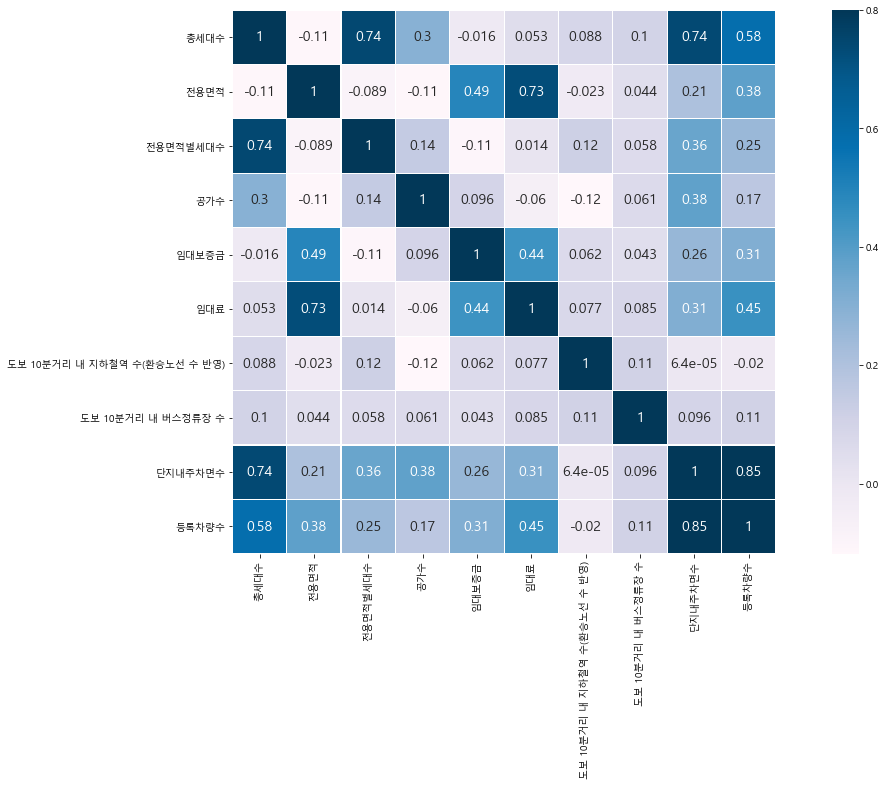

In [266]:
corrMatt = train[["총세대수", "공급유형", "전용면적", "전용면적별세대수", "공가수", "자격유형", "임대보증금","임대료",'도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수','단지내주차면수','등록차량수']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

colormap = plt.cm.PuBu

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt,vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap, linecolor="white",annot_kws = {'size':14}
           )

##  feature engineering

Skewness: -1.104974
Kurtosis: 1.961021


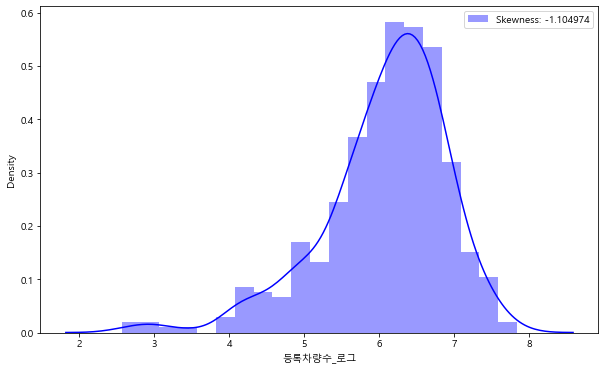

In [267]:
train["등록차량수_로그"] = train["등록차량수"].map(lambda i:np.log(i)if i>0 else 0) 
f, ax = plt.subplots(1, 1, figsize = (10,6)) 
g = sns.distplot(train["등록차량수_로그"], color = "b", label="Skewness: {:2f}".format(train["등록차량수_로그"].skew()), ax=ax) 
g = g.legend(loc = "best") 
print("Skewness: %f" % train['등록차량수_로그'].skew()) 
print("Kurtosis: %f" % train['등록차량수_로그'].kurt()) 
train.drop('등록차량수', axis= 1, inplace=True)


In [268]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 261 to 2041
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          423 non-null    object 
 1   총세대수                          423 non-null    int64  
 2   임대건물구분                        423 non-null    object 
 3   지역                            423 non-null    object 
 4   공급유형                          423 non-null    object 
 5   전용면적                          423 non-null    float64
 6   전용면적별세대수                      423 non-null    int64  
 7   공가수                           423 non-null    float64
 8   자격유형                          423 non-null    object 
 9   임대보증금                         423 non-null    int32  
 10  임대료                           423 non-null    int32  
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  403 non-null    float64
 12  도보 10분거리 내 버스정류장 수            422 non-null    float64
 13  단지

In [269]:
train.set_index(['단지코드'])
test.set_index(['단지코드'])

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,rank
단지코드,,,,,,,,,,,,,,
C2676,2572,아파트,부산광역시,영구임대,26.37,1341,25.0,C,5787000,79980,0.0,2.0,418.0,1.0
C1812,1021,아파트,울산광역시,영구임대,26.37,745,22.0,C,3922000,72830,0.0,4.0,185.0,1.0
C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,1.0
C2028,1267,아파트,경상남도,국민임대,59.88,740,26.0,A,31210000,187260,0.0,12.0,1280.0,1.0
C2224,826,아파트,경상남도,국민임대,51.59,658,26.0,A,27597000,315070,0.0,4.0,746.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2404,214,아파트,전라남도,행복주택,36.85,60,15.0,J,25600000,160000,0.0,5.0,117.0,1.0
C2688,150,아파트,전라남도,국민임대,33.53,56,1.0,H,6682000,115130,0.0,3.0,107.0,1.0
C1327,98,아파트,대전광역시,행복주택,36.92,48,13.0,J,36800000,184000,NaN,17.0,98.0,1.0


In [270]:

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 114 to 890
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          150 non-null    object 
 1   총세대수                          150 non-null    int64  
 2   임대건물구분                        150 non-null    object 
 3   지역                            150 non-null    object 
 4   공급유형                          150 non-null    object 
 5   전용면적                          150 non-null    float64
 6   전용면적별세대수                      150 non-null    int64  
 7   공가수                           150 non-null    float64
 8   자격유형                          149 non-null    object 
 9   임대보증금                         148 non-null    object 
 10  임대료                           148 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  145 non-null    float64
 12  도보 10분거리 내 버스정류장 수            150 non-null    float64
 13  단지내

In [271]:
test.loc[~test['임대료'].isnull()]['임대료'].astype(int).mean()

175926.4189189189

In [272]:
test.loc[test['임대료'].isnull(),'임대료'] = 175242

In [273]:
train = train[['총세대수','단지내주차면수','임대료','등록차량수_로그']]
test_code = test['단지코드']
test = test[['총세대수','단지내주차면수','임대료']]

## modeling

In [274]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
X_train = train.drop("등록차량수_로그", axis = 1).values 
target_label = train["등록차량수_로그"].values 
X_test = test.values 
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.2, random_state = 2000)


In [275]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05, max_depth=4, min_samples_leaf=15, min_samples_split=10, random_state=42)
regressor.fit(X_tr, y_tr)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

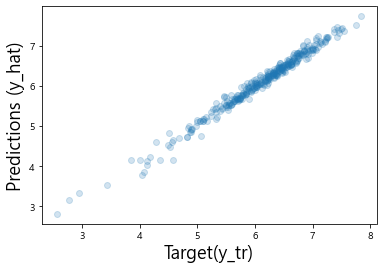

In [276]:
y_hat = regressor.predict(X_tr)
plt.scatter(y_tr, y_hat, alpha=0.2)
plt.xlabel('Target(y_tr)', size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

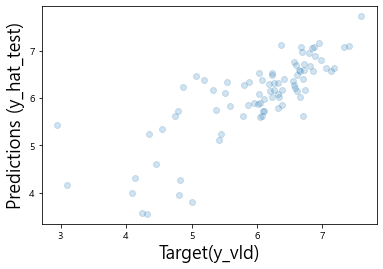

In [277]:
y_hat_test = regressor.predict(X_vld)
plt.scatter(y_vld, y_hat_test, alpha=0.2)
plt.xlabel('Target(y_vld)', size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [285]:
print(regressor.score(y_vld,))

ValueError: Expected 2D array, got 1D array instead:
array=[5.8833222 6.786717  7.0475173 6.8046145 5.0039463 5.549076  4.317488
 6.4118185 6.857514  6.234411  4.0943446 4.454347  5.0689044 5.379897
 4.8202815 2.944439  6.082219  6.204558  6.0450053 6.8394766 6.675823
 4.8675346 4.787492  5.8081427 5.7899604 5.9558372 5.32301   7.329094
 6.6463904 6.684612  6.315358  6.25575   6.011267  7.410347  6.107023
 4.8121843 6.3868794 6.1114674 3.0910425 6.3189683 6.3801227 6.886532
 6.612041  5.4553213 6.0330863 6.2304816 5.420535  6.552508  6.09131
 5.187386  6.9697905 4.1431346 6.0450053 6.703188  6.8638034 6.5998707
 4.248495  6.3613024 6.313548  5.866468  6.6133842 6.6618547 5.583496
 6.253829  6.710523  6.2245584 7.174724  6.6970344 6.568078  6.175867
 6.7345915 4.356709  6.0306854 4.543295  5.5053315 7.592366  6.659294
 6.3421216 6.7129564 6.5834093 6.5694814 7.1228666 6.075346  6.9508147
 4.75359  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [279]:
log_val = 1
pred = regressor.predict(X_test)

sub = pd.DataFrame()
sub['code'] = test_code
sub['num'] = pred

if log_val == 1:
    sub['num'] = np.exp(sub['num'])
sub['num'] = round(sub['num'],0).astype(int)
    
import os
os.path
sub.to_csv('F:/01_WORK/98_STUDY/kaggle/parkingdemand/result/submission210708.csv', index=False)

In [280]:
sub

,code,num
114,C2676,305
231,C1812,212
258,C2253,90
608,C2028,1530
714,C2224,959
...,...,...
977,C2404,39
881,C2688,36
894,C1327,40
955,C1841,117
